## Fake News Detection 


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import roc_curve,auc


#### About the Data Set

The 2017 US Election saw a significant amount of both true and fake news. The Horne 2017 Fake News Data contains two independent news datasets. The first is the Buzzfeed Political News Data, which was originally analyzed by Craig Silverman of Buzzfeed News. This dataset includes both opinion-based real stories and satire-based fake stories. The second dataset is the Random Political News Data, which was randomly collected from three types of sources during 2016

#### Importing Data Set


In [2]:
df_fake = pd.read_csv("Fake.csv",sep=',',error_bad_lines=False, encoding='ISO-8859-1', skiprows=1, names=['title', 'text', 'subject', 'date'])

/var/folders/bp/xcn4mbr53tscnw24mpsq4m0m0000gn/T/ipykernel_58603/4258727915.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_fake = pd.read_csv("Fake.csv",sep=',',error_bad_lines=False, encoding='ISO-8859-1', skiprows=1, names=['title', 'text', 'subject', 'date'])


In [3]:
df_true = pd.read_csv("True.csv",sep=',',error_bad_lines=False, encoding='ISO-8859-1', skiprows=1, names=['title', 'text', 'subject', 'date'])

/var/folders/bp/xcn4mbr53tscnw24mpsq4m0m0000gn/T/ipykernel_58603/464341061.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_true = pd.read_csv("True.csv",sep=',',error_bad_lines=False, encoding='ISO-8859-1', skiprows=1, names=['title', 'text', 'subject', 'date'])
Skipping line 11067: expected 4 fields, saw 8



In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#### Inserting a column "class" as a target value Feature

In [6]:
df_fake["class"] = 0

In [7]:
df_true["class"] = 1

In [8]:
df_fake.shape, df_true.shape

((23481, 5), (21416, 5))

### Merging True and Fake Data Frames

In [15]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [16]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

### Removing The column which are not required

In [17]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [18]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Random Shuffling The data frame

In [19]:
df = df.sample(frac = 1)

In [20]:
df.head()

,text,class
2277,Following a series of unhinged tweets from Tru...,0
10334,WASHINGTON (Reuters) - U.S. President Barack O...,1
17273,LONDON (Reuters) - An auction of 31 artworks d...,1
17844,PARIS/GENEVA (Reuters) - Switzerland is sendin...,1
10605,NEW YORK (Reuters) - Connecticut will cancel p...,1


In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.head()

,text,class
0,Following a series of unhinged tweets from Tru...,0
1,WASHINGTON (Reuters) - U.S. President Barack O...,1
2,LONDON (Reuters) - An auction of 31 artworks d...,1
3,PARIS/GENEVA (Reuters) - Switzerland is sendin...,1
4,NEW YORK (Reuters) - Connecticut will cancel p...,1


#### Creating a Function to Process the Text

In [24]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [25]:
df["text"] = df["text"].apply(wordopt)

#### Defining Dependent and Independent Variable

In [26]:
x = df["text"]
y = df["class"]

##### Splitting Testing and Training

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

##### Convert Text to Vector

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [29]:
text=' '.join(df["text"])

In [30]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [31]:
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=STOPWORDS)

In [32]:
wordcloud.generate(text)

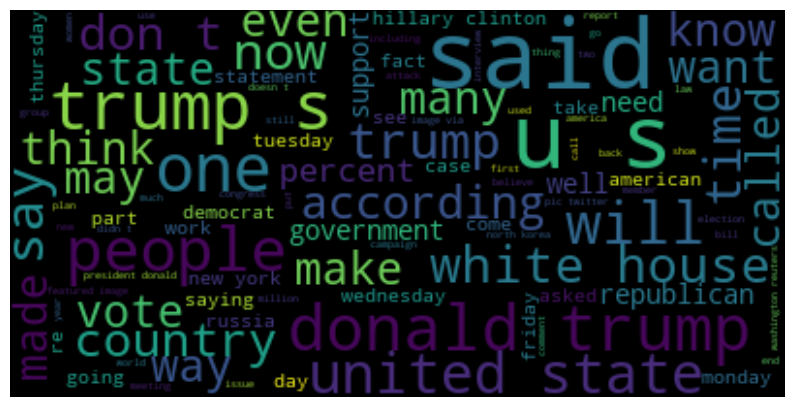

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=LR.predict(xv_test)

In [36]:
LR.score(xv_test, y_test)

0.9866369710467706

In [37]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5868
           1       0.99      0.99      0.99      5357

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [38]:
from sklearn.metrics import confusion_matrix

+ Confusion Matrix

In [39]:
cf_lr = confusion_matrix(y_test, pred_lr)
print(cf_lr)

[[5788   80]
 [  70 5287]]


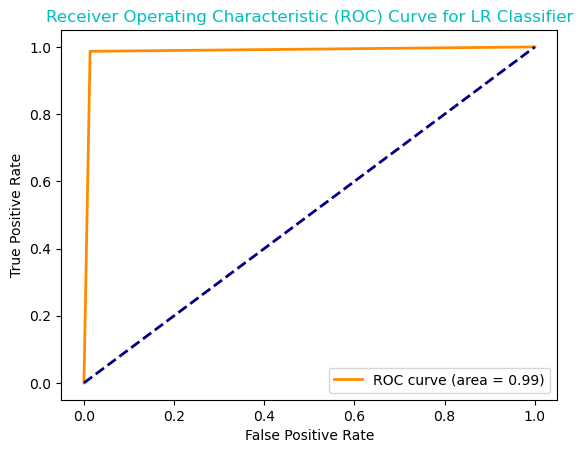

In [40]:
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, pred_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LR Classifier',c='c')
plt.legend(loc='lower right')
plt.show()

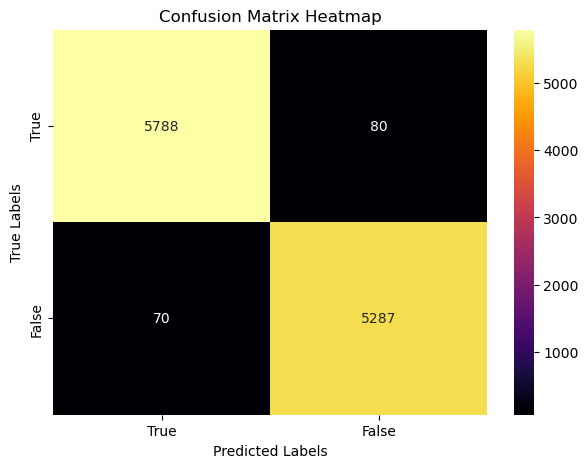

In [41]:
df_cm = pd.DataFrame(cf_lr, index=['True', 'False'], columns=['True', 'False'])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='.0f', cmap='inferno')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Decision Tree Classification

In [42]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [43]:
pred_dt = DT.predict(xv_test)

In [44]:
DT.score(xv_test, y_test)

0.9961692650334075

In [45]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5868
           1       1.00      0.99      1.00      5357

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



+ Confusion Matrix

In [46]:
cf_dt = confusion_matrix(y_test, pred_dt)
print(cf_dt)

[[5852   16]
 [  27 5330]]


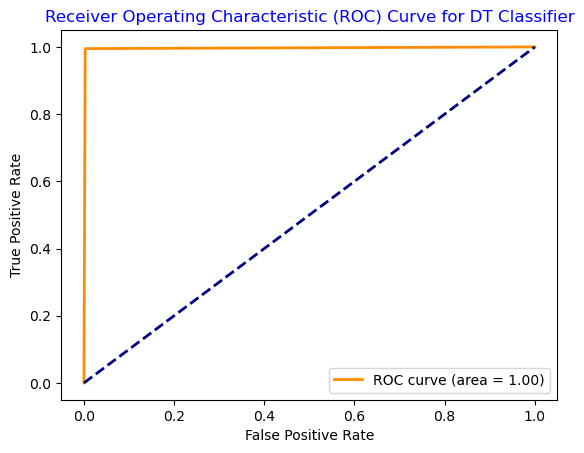

In [47]:
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, pred_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DT Classifier',c='b')
plt.legend(loc='lower right')
plt.show()

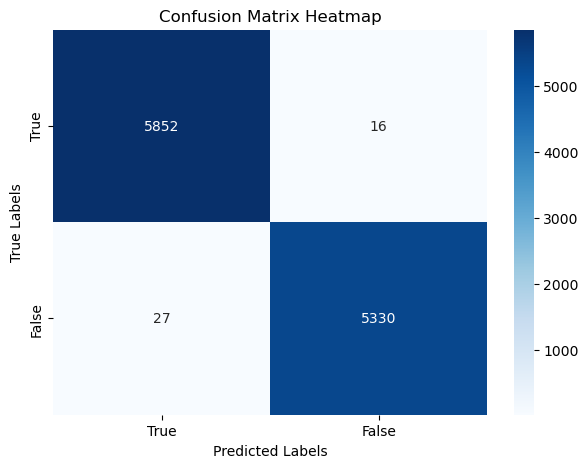

In [48]:
df_cm = pd.DataFrame(cf_dt, index=['True', 'False'], columns=['True', 'False'])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [50]:
pred_gbc = GBC.predict(xv_test)

In [51]:
GBC.score(xv_test, y_test)

0.995456570155902

In [52]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5868
           1       0.99      1.00      1.00      5357

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



+ Confusion Matrix

In [53]:
cf_gbc = confusion_matrix(y_test, pred_gbc)
print(cf_gbc)

[[5830   38]
 [  13 5344]]


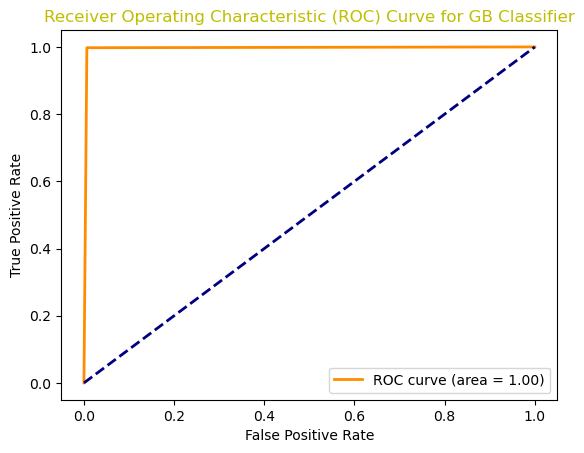

In [54]:
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, pred_gbc)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GB Classifier',c='y')
plt.legend(loc='lower right')
plt.show()

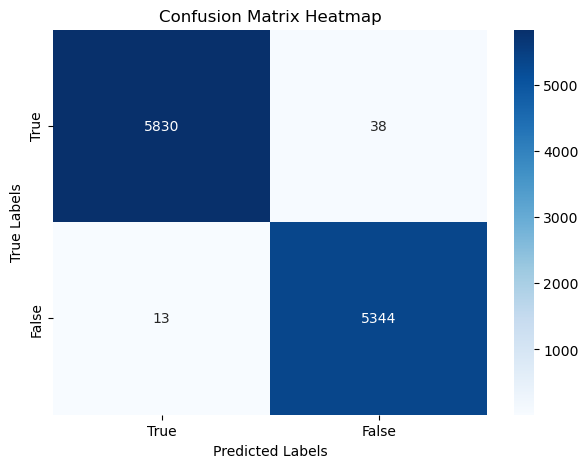

In [55]:
df_cm = pd.DataFrame(cf_gbc, index=['True', 'False'], columns=['True', 'False'])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
pred_rfc = RFC.predict(xv_test)

In [58]:
RFC.score(xv_test, y_test)

0.9892204899777283

In [59]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5868
           1       0.99      0.99      0.99      5357

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



+ Confusion Matrix

In [60]:
cf_rf = confusion_matrix(y_test, pred_rfc)
print(cf_rf)

[[5815   53]
 [  68 5289]]


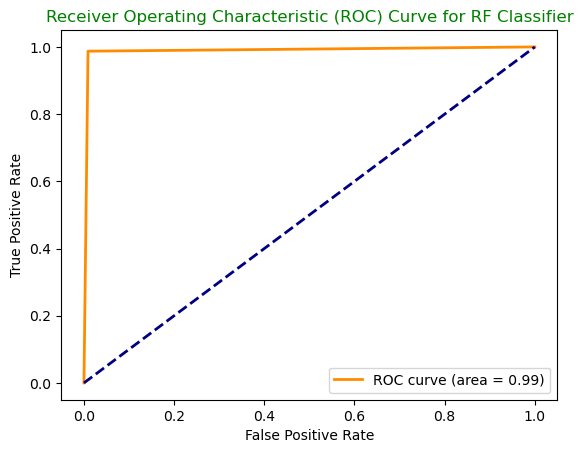

In [61]:
# Plot the ROC curve
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, pred_rfc)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RF Classifier',c='g')
plt.legend(loc='lower right')
plt.show()


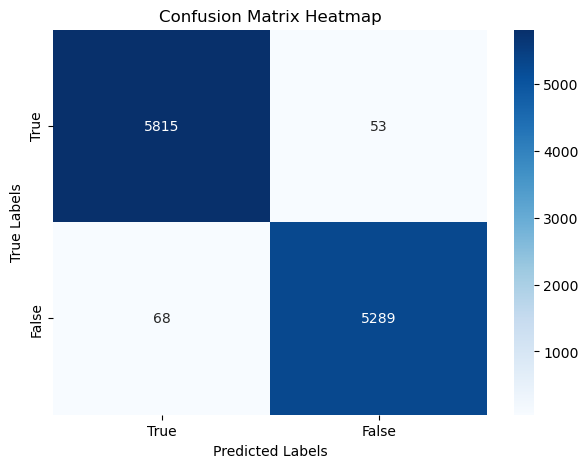

In [62]:
df_cm = pd.DataFrame(cf_rf, index=['True', 'False'], columns=['True', 'False'])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Model Testing 

In [63]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

### Saving as pickle files

In [67]:
import pickle

In [68]:
with open('random_forest_model.pkl','wb') as model_file:
    pickle.dump(RFC,model_file)
    
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(vectorization,vectorizer_file)